# Convolutional Neural Networks

## LeNet-5

In [2]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import torchvision.transforms as transforms

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\ProgramData\Miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ProgramData\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
train_dataset = datasets.MNIST(root='private', 
                               train=True, 
                               transform=transforms.Compose([
                                 transforms.ToTensor()  
                               ]),
                               download=True)

test_dataset = datasets.MNIST(root='private', 
                              train=False, 
                              transform=transforms.Compose([
                                 transforms.ToTensor()  
                               ]))

In [6]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [7]:
next(train_loader.__iter__())[0].shape, next(train_loader.__iter__())[1].shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            # sigmoid?
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
        )

    def forward(self, x):
        out = self.net(x)
        return out

model = LeNet()
model.to(device)

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [12]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.net = nn.Sequential(
            # 1. 从 6 个卷积核增加到 12 个
            nn.Conv2d(1, 12, kernel_size=5, padding=2),
            nn.ReLU(),
            # 2. 改为使用 MaxPool2d
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 3. 从 16 个卷积核增加到 32 个
            nn.Conv2d(12, 32, kernel_size=5),
            nn.ReLU(),
            # 4. 改为使用 MaxPool2d
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(32*5*5, 120),
            nn.ReLU(),
            # 5. 增加 BatchNorm1d
            nn.BatchNorm1d(120),
            nn.Linear(120, 84),
            nn.ReLU(),
            # 6. 增加 BatchNorm1d
            nn.BatchNorm1d(84),
            # 7. 增加一个全连接层
            nn.Linear(84, 84),
            nn.ReLU(),
            # 8. 增加 BatchNorm1d
            nn.BatchNorm1d(84),
            nn.Linear(84, 10),
            # 9. 增加 Softmax
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        out = self.net(x)
        return out

model = MyCNN()
model.to(device)

MyCNN(
  (net): Sequential(
    (0): Conv2d(1, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=800, out_features=120, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=120, out_features=84, bias=True)
    (11): ReLU()
    (12): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Linear(in_features=84, out_features=84, bias=True)
    (14): ReLU()
    (15): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (16): Linear(in_features=84, out_features=10, bias=True)
    (17): Softmax(dim=1)
  )
)

In [13]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_().to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.requires_grad_().to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.477274775505066. Accuracy: 97.97000122070312
Iteration: 1000. Loss: 1.4755924940109253. Accuracy: 98.5999984741211
Iteration: 1500. Loss: 1.474888563156128. Accuracy: 98.62000274658203
Iteration: 2000. Loss: 1.4799821376800537. Accuracy: 98.75
Iteration: 2500. Loss: 1.4656410217285156. Accuracy: 98.88999938964844
Iteration: 3000. Loss: 1.4658583402633667. Accuracy: 98.70999908447266


In [14]:
def compute_conf_matrix(model, data_loader):
    conf_matrix = np.zeros((10,10))
    for images, labels in data_loader:
        images = images.requires_grad_().to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for t, p in zip(labels.view(-1), predicted.view(-1)):
            conf_matrix[t.long(), p.long()] += 1

    return conf_matrix

conf_matrix = compute_conf_matrix(model, test_loader)
print(conf_matrix)

[[9.730e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00
  0.000e+00 1.000e+00 3.000e+00]
 [0.000e+00 1.129e+03 4.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.023e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 1.002e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 9.580e+02 0.000e+00 3.000e+00
  0.000e+00 2.000e+00 1.800e+01]
 [1.000e+00 0.000e+00 1.000e+00 7.000e+00 0.000e+00 8.800e+02 2.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [4.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 9.500e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 6.000e+00 8.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+03 2.000e+00 1.100e+01]
 [3.000e+00 0.000e+00 3.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 9.600e+02 4.000e+00]
 [0.000e+00 2.000e+00 1.000e+00 2.000e+00 3.000e+00 3.0

Text(69.0, 0.5, 'True')

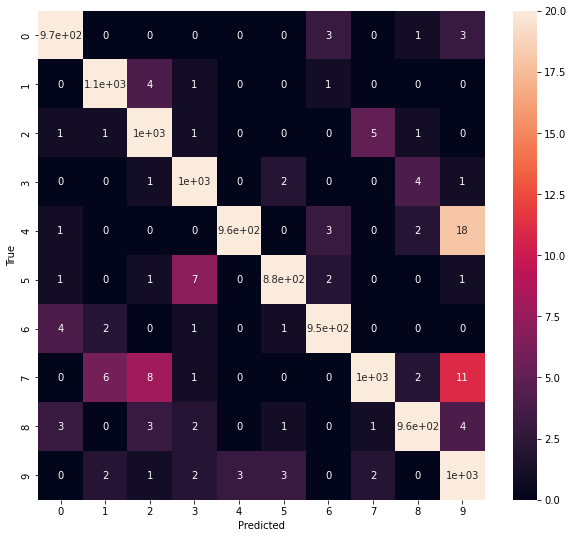

In [15]:
plt.subplots(figsize=(10,9))
ax = sns.heatmap(conf_matrix, annot=True, vmax=20)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')